In [ ]:
!pip install python-pachyderm

In [3]:
commit_id = "be82b14369c74ff7bbdf9866d6f701ee"

In [4]:
import python_pachyderm as pc
client = pc.Client(host="pachd.pachyderm.svc.cluster.local")


In [6]:
import pandas as pd
wines = client.get_file(("wines", "master", commit_id), "wine.csv")
wines_df = pd.read_csv(wines, delimiter=';')


In [7]:
# Split data into training and test

wine_train = wines_df.sample(frac=0.7)
print(wine_train.shape)

(3429, 12)


In [9]:
wine_test = wines_df.loc[~wines_df.set_index(list(wines_df.columns)).index.isin(wine_train.set_index(list(wine_train.columns)).index)]
print(wine_test.shape)

(1076, 12)


In [14]:
from sklearn.linear_model import LinearRegression
features = ['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']
wine_ln_reg = LinearRegression()
wine_ln_reg = wine_ln_reg.fit(wine_train[features], wine_train['quality'])

In [15]:
print(wine_ln_reg.coef_)
print(wine_ln_reg.intercept_)

[-2.17059508e+00  2.80673121e-02 -7.19023133e-01  6.09900162e-04
  4.09032470e-01  3.77075969e-01]
2.0902969632072494


In [18]:
wine_ln_pred = wine_ln_reg.predict(wine_test[features])
wine_ln_resid = wine_ln_pred - wine_test['quality']

Text(0.5, 1.0, 'Normal Q-Q Plot')

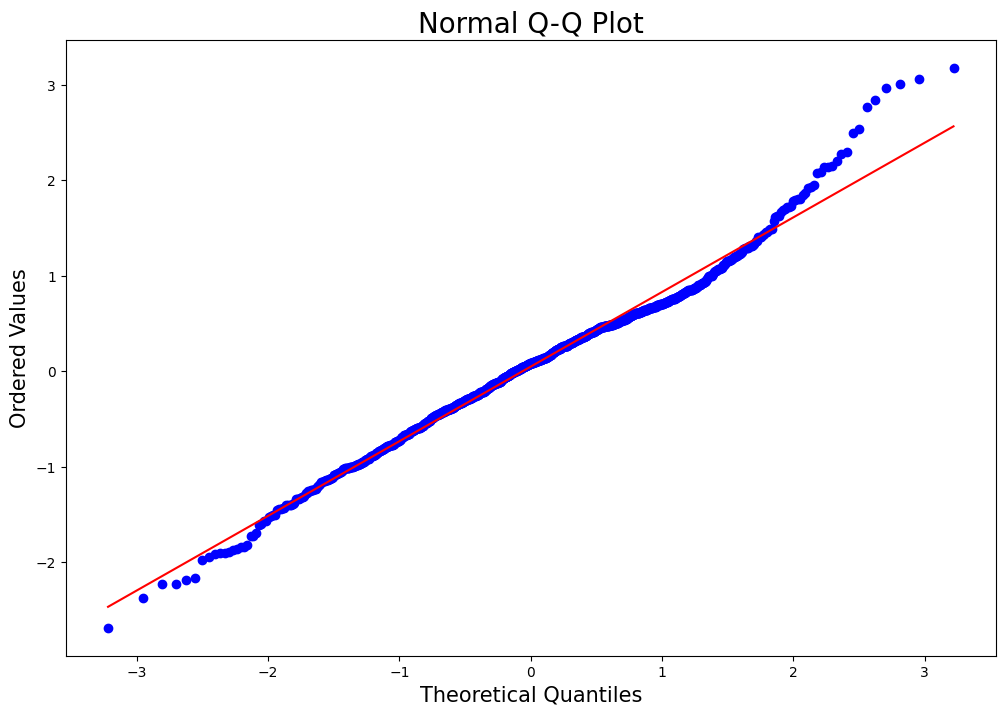

In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
# Normal Q-Q plot
stats.probplot(wine_ln_resid, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles",fontsize=15)
plt.ylabel("Ordered Values",fontsize=15)
plt.title("Normal Q-Q Plot",fontsize=20)